# Project: Chatbot for CV management



Technique: Retrieval Augmented Generation (RAG)


1.   RAG allows updating knowledge sources dynamically without retraining.  
    (Fine-tunning can't do this.)

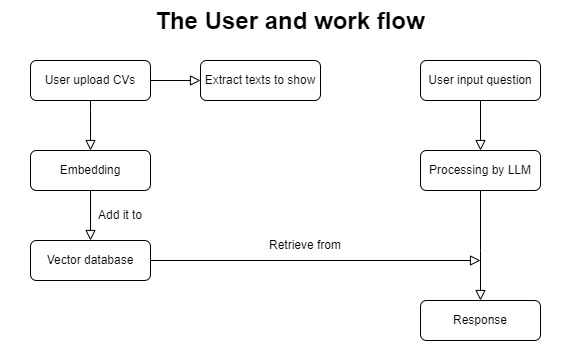






In [ ]:
# Install langchain for building language applications
# Install replicate for accessing models hosted on Replicate
# Install sentence-transformers for sentence-level embeddings
# Install chromadb for a simple Chroma key database
# Install pypdf for PDF manipulation
# Install gradio for creating ML model demos and interfaces
!pip install langchain replicate sentence-transformers chromadb pypdf gradio

In [ ]:
# langchain.llms.Replicate to use models hosted on Replicate platform
from langchain.llms import Replicate

# os for operating system dependent functionality
import os

# langchain.chains for chaining different models and functionalities in conversation
from langchain.chains import ConversationChain

# langchain.memory for conversation history maintenance
from langchain.memory import ConversationBufferMemory

# langchain.document_loaders for loading documents, PyPDFLoader for PDF files
from langchain.document_loaders import PyPDFLoader

# langchain.text_splitter for splitting text into manageable parts
from langchain.text_splitter import RecursiveCharacterTextSplitter

# langchain.vectorstores for storing vector representations, Chroma for key-value storage
from langchain.vectorstores import Chroma

# langchain.embeddings for managing embeddings, using HuggingFace models
from langchain.embeddings import HuggingFaceEmbeddings

from langchain.chains import ConversationalRetrievalChain

# langchain.schema for data structures related to messages in conversation
from langchain.schema import AIMessage, HumanMessage

# gradio for creating easy-to-use interfaces for models
import gradio as gr

from langchain.chains import RetrievalQA

from langchain.llms import Replicate

In [ ]:
# Set the api and the environment
os.environ["REPLICATE_API_TOKEN"] = "r8_3Da7pwAQAtWxhhKHfSbDsbeBuRs6WcX3qj5dh"
llama2_13b = "meta/llama-2-13b-chat:f4e2de70d66816a838a89eeeb621910adffb0dd0baba3976c96980970978018d"
llm = Replicate(
    model=llama2_13b,
    model_kwargs={"temperature": 0.01, "top_p": 1, "max_new_tokens":500}
)


In [ ]:
def splitter(docs):
# Initialize the RecursiveCharacterTextSplitter with a specified chunk size and overlap
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=20)

    # Split the provided documents into chunks
    all_splits = text_splitter.split_documents(docs)

    # Return the list of chunks for each document
    return all_splits

In [ ]:
# Initialize a PyPDFLoader with the path to the PDF file to be processed
loader_BASEFILE = PyPDFLoader('/content/Cv for stem (1) (2)-已壓縮 (1).pdf')
# Load the PDF data from the specified file
BASEFILE_PDF_data = loader_BASEFILE.load()
# Use the 'splitter' function to divide the PDF text into manageable chunks
all_split_forBASE = splitter(BASEFILE_PDF_data)

# Initialize HuggingFaceEmbeddings with a specific transformer model, specifying to run on CPU
model_name = "sentence-transformers/all-MiniLM-L6-v2"
model_kwargs = {'device': 'cpu'}
embeddings = HuggingFaceEmbeddings(model_name=model_name, model_kwargs=model_kwargs)
# Create a vector database using Chroma to store embeddings of the split text chunks
# This facilitates efficient retrieval of similar text chunks based on their semantic content
vectordb = Chroma.from_documents(
    documents=all_split_forBASE,
    embedding=embeddings,
)

In [ ]:
def add_data(docs):
  # Split the input documents into manageable chunks
  all_splits = splitter(docs)
  # Add each document chunk to the vector database with a unique ID
  vectordb.add_documents(
    documents=all_splits,
    embedding=embeddings,
    ids=[f'id{i}' for i in range(len(all_splits))]
  )


In [ ]:
def extract_text_from_pdf(pdf): # the input should be pathe
# Load PDF content using a PyPDFLoader initialized with the provided file path
  loader = PyPDFLoader(pdf)
  docs = loader.load()
  # Process and add the loaded document to the vector database
  add_data(docs)
  # Construct a prompt for the language model to clean and structure the CV text
  prompt = f'''Clean some special character and the output should not be a paragraph.
    Extract and organize key information from the CV by identifying
    and cleaning relevant sections, and structuring the data for easy access.
    Utilize techniques for recognizing structured data like tables and for pulling out
    entities and key phrases from unstructured text. Focus on accurately pulling out names,
    dates, and important figures, and ensure the output is clear and usable for analysis.
    Format the extracted data in a structured file in point form for further use. Provide the
    extracted information directly and never show any introductory or greeting phrases, never contain
    texts like this "Here is the extracted and organized information from the CV:" and notes.
    The result should able to get by return and do not need print()
    so you should not use \n ad \t and generate the same result
     This is the CV:{docs}.
    '''
# Invoke the language model (assuming 'llm' is previously defined and configured)
  result = llm.invoke(prompt)

# Return the processed and structured result
  return result

In [ ]:
# Print the extracted and organized information from the CV PDF to verify the output
print(extract_text_from_pdf('/content/Cv for stem (1) (2)-已壓縮 (1).pdf'))

 Sure, I'd be happy to help! Here is the extracted and organized information from the CV:

EDUCATION:

* Bachelor of Artificial Intelligence and Educational Technology (The Education University of Hong Kong)
* CHAN SUI KI (LA SALLE) COLLEGE

WORKING EXPERIENCE:

* SENtoR Education Company Limited (STEM internship)
	+ Demonstrated skills in game making, programming, and database management
	+ Created a scratch game for students
	+ Stored data of students and teachers as a database

SKILLS:

* Computer programming skills
* Game making skills
* STEM making skills (robotics)
* Game creating and teaching skills
* Great communication skills
* Critical thinking skills

EXTracurricular activities:

* Stem day of Sau Mau Ping Catjoli c Primary School
* Volunteer of elderly visiting
* General Affairs Department Director

Please note that I have removed the introductory phrases and any unnecessary information from the CV, and structured the data in a point form for easy access.


In [ ]:
# Initialize a retrieval-based QA system by chaining a language model (llm) with a vector database retriever
qa_chain = RetrievalQA.from_chain_type(
    llm,
    retriever=vectordb.as_retriever()
)

In [ ]:
# Define a question to be answered by the QA system
question = "Who is Chen Yat Ting?"
# Use the QA system to process the question and retrieve relevant information
result = qa_chain.invoke({"query": question})
# Print the result obtained from the QA system, expected to contain the answer
print(result['result'])

 Based on the information provided, Chen Yat Ting is a motivated and driven individual with a strong passion for STEM activities, AI, programming, and data analysis. They have a solid foundation in AI learning gained during their school years and proficiency in programming languages such as PHP and Python. They are eager to expand their knowledge and skills in these fields and have actively engaged in various STEM projects, competitions, and workshops to enhance their problem-solving abilities and analytical thinking skills. They have a continuous drive for learning and growth and are excited to contribute to and thrive in an environment that fosters innovation and cutting-edge technological advancements.

Chen Yat Ting has a Bachelor of Artificial Intelligence and Educational Technology from The Education University of Hong Kong and has working experience in the field. They can be contacted at [地址] (852)55949393 or via email at s1145792@s.eduhk.hk.


In [ ]:
# Initialize a conversational retrieval chain with a language model and a vector database retriever.
# The chain is configured to return source documents along with the responses to facilitate deeper context understanding.

# The model will deal the message from the user as a new chat without this step.

chat_chain = ConversationalRetrievalChain.from_llm(llm, vectordb.as_retriever(), return_source_documents=True)

In [ ]:
# Invoke the conversational retrieval chain with the current question and an empty chat history
result = chat_chain.invoke({"question": question, "chat_history": []})
# Print the answer retrieved from the conversational system
print(result['answer'])

 Based on the information provided, Chen Yat Ting is a motivated and driven individual with a strong passion for STEM activities, AI, programming, and data analysis. They have a solid foundation in AI learning gained during their school years and proficiency in programming languages such as PHP and Python. They are eager to expand their knowledge and skills in these fields and have actively engaged in various STEM projects, competitions, and workshops to enhance their problem-solving abilities and analytical thinking skills. They have a continuous drive for learning and growth and are excited to contribute to and thrive in an environment that fosters innovation and cutting-edge technological advancements.

Chen Yat Ting has a Bachelor of Artificial Intelligence and Educational Technology from The Education University of Hong Kong and has working experience in the field. They can be contacted at [地址 ] (852)55949393 or via email at s1145792@s.eduhk.hk.


In [ ]:
# This time we pass chat history along with the follow up so good things should happen
chat_history = [(question, result["answer"])]
followup = "what are its use cases?"
followup_answer = chat_chain({"question": followup, "chat_history": chat_history})
print(followup_answer['answer'])

 Sure, I'd be happy to help! Based on Chen Yat Ting's profile, here are some potential use cases for her skills and experience in AI, programming, and data analysis:

1. Data Analytics: With her proficiency in programming languages such as PHP and Python, Chen Yat Ting could analyze and interpret complex data sets to extract valuable insights and patterns.
2. Machine Learning: Her solid foundation in AI learning and experience with data analysis could be applied to develop and train machine learning models for various applications, such as image recognition, natural language processing, and predictive analytics.
3. Automation: Chen Yat Ting's skills in programming and data analysis could be used to automate repetitive tasks and processes, freeing up time for more strategic and creative work.
4. AI-powered Solutions: With her experience in AI and educational technology, Chen Yat Ting could develop AI-powered solutions for the education sector, such as personalized learning systems, grad

In [ ]:
# Invoke the conversational chain with a specific question and no prior chat history to retrieve information about Chen Yat Ting
gpt_response = chat_chain.invoke({"question": 'what is ChenYatTing', "chat_history": []})
# Print the response from the conversational retrieval system which contains the answer to the question
print(gpt_response['answer'])

 Based on the information provided, ChenYatTing appears to be a person with a strong passion for STEM activities, AI, programming, and data analysis. They have a solid foundation in AI learning and proficiency in programming languages such as PHP and Python. They are eager to expand their knowledge and skills in these fields and have actively engaged in various STEM projects, competitions, and workshops to enhance their problem-solving abilities and analytical thinking skills. They have a continuous drive for learning and growth and are excited to contribute to and thrive in an environment that fosters innovation and cutting-edge technological advancements.

Please note that I cannot provide a more specific answer as the information provided is a profile and there is no specific question asked. If you have any specific questions, I'll be happy to help.


In [ ]:
def predict(message, history):
  # Invoke the conversational chain with the given message and an empty chat history to generate a response
    gpt_response = chat_chain.invoke({"question": message, "chat_history": []}) #history_langchain_format) # Replace [] with history if historical context should be used

    # Return the textual answer part of the response from the conversational chain
    return gpt_response['answer']#.content

In [ ]:
# Create a Gradio app using Blocks interface to host both a chatbot and a PDF text extractor
with gr.Blocks() as app:
  # Add a title to the app using Markdown
    gr.Markdown("# Chatbot and PDF Data Extractor")
# Create a row to contain two columns: one for the chatbot, one for the PDF extractor
    with gr.Row():
      # Define the first column for the Chatbot interface
        with gr.Column():
          # Add a section title for the chatbot
            gr.Markdown("### Chatbot")
            # Add a chat interface that connects to the 'predict' function for processing user messages
            gr.ChatInterface(predict)
 # Define the second column for the PDF Text Extractor
        with gr.Column():
           # Add a section title for the PDF extractor
            gr.Markdown("### PDF Text Extractor")
            # Group components related to PDF extraction together
            with gr.Group():
               # Create an upload field for users to upload PDF files
                pdf_file = gr.File(label="Upload a PDF file")
                # Create a textbox to display extracted text from the PDF, not interactive as it's display-only
                extracted_text = gr.Textbox(label="Extracted Text", interactive=False)
                # Create a button that will trigger the text extraction process
                pdf_button = gr.Button("Extract Text")
                 # Link the button click to a function that extracts text from the uploaded PDF, specifying input and output components
            pdf_button.click(extract_text_from_pdf, inputs=pdf_file, outputs=extracted_text)

# Launch the app, making it available as a web interface
app.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ea8a62fd3985358e78.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
